Another effort to tune up the corpus. This time, use Library of Congress metadata.

In [1]:
from os import listdir
from os.path import isfile, join
from json import loads
from re import findall,UNICODE
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np
from database.bookclass import Book_raw_data
import pickle

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *

In [2]:
# all our essentials
from matplotlib import rc,rcParams
rc('font', family='sans-serif') 
rc('font', serif='Helvetica Neue')
rc('text', usetex='false')

rc('font', family='serif')
rc('font', family='cmr10')
rc('text', usetex='true')
# this should accomplish the same thing
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{hyperref}'
rcParams['text.latex.unicode'] = True

rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
%matplotlib inline

# import matplotlib
# matplotlib.use("pgf")
# pgf_with_custom_preamble = {
#     "text.usetex": True,
#     "text.latex.unicode": True,
#     "pgf.preamble": [
#         r"\usepackage{hyperref}"
#         ]
# }
# matplotlib.rcParams.update(pgf_with_custom_preamble)
# matplotlib.rcParams.update({'font.size': 12})
# from matplotlib import pyplot as plt

In [3]:
q_paper = Book.objects.filter(exclude=False,length__gt=10000,length__lte=100000,downloads__gte=20,lang_code_id=0)

In [4]:
all_book_metadata_raw = pickle.load(open("data/gutenberg/all-book-metadata-raw-51249.p","rb"))

In [5]:
len(all_book_metadata_raw)

51249

In [6]:
all_book_metadata_raw[0]

{'authors': [(rdflib.term.URIRef('http://www.gutenberg.org/2009/agents/1638'),
   rdflib.term.URIRef('http://www.gutenberg.org/2009/pgterms/name'),
   rdflib.term.Literal('Jefferson, Thomas'))],
 'downloads': [(rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1'),
   rdflib.term.URIRef('http://www.gutenberg.org/2009/pgterms/downloads'),
   rdflib.term.Literal('673', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))],
 'lang_refs': [(rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1'),
   rdflib.term.URIRef('http://purl.org/dc/terms/language'),
   rdflib.term.BNode('Ncadb12c97fc84c5a98edd6805c02c49e'))],
 'langs': [(rdflib.term.BNode('Ncadb12c97fc84c5a98edd6805c02c49e'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#value'),
   rdflib.term.Literal('en', datatype=rdflib.term.URIRef('http://purl.org/dc/terms/RFC4646')))],
 'title': [(rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1'),
   rdflib.term.URIRef('http://purl.org/dc/terms/t

In [7]:
from rdflib import Graph
import rdflib
import pprint

In [8]:
end_book = 51249
# end_book = 10
for i in range(end_book):
    folder = join("data/gutenberg/cache/epub/",str(i+1))
#     print(folder)
    file = join("data/gutenberg/cache/epub/",str(i+1),"pg"+str(i+1)+".rdf")
#     print(file)
#     print(isfile(file))
    if not isfile(file):
        print(file)

In [9]:
g = Graph()
g.parse("data/gutenberg/cache/epub/1/pg1.rdf", format="xml")

<Graph identifier=N47e1fa8e96a849f7becf68335a47b87c (<class 'rdflib.graph.Graph'>)>

In [10]:
import pprint
for stmt in g:
    # pprint.pprint(stmt)'
    # print(stmt)
    print("==")
    print(stmt)
#     print(stmt[0])
#     print(stmt[1])
#     print(stmt[2])

==
(rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1'), rdflib.term.URIRef('http://purl.org/dc/terms/license'), rdflib.term.URIRef('http://www.gutenberg.org/license'))
==
(rdflib.term.BNode('N7d153b776ef54fbf88822495e17d8ba5'), rdflib.term.URIRef('http://purl.org/dc/dcam/memberOf'), rdflib.term.URIRef('http://purl.org/dc/terms/IMT'))
==
(rdflib.term.URIRef('http://www.gutenberg.org/files/1/1.txt'), rdflib.term.URIRef('http://purl.org/dc/terms/modified'), rdflib.term.Literal('2015-03-31T16:00:16', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime')))
==
(rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1'), rdflib.term.URIRef('http://purl.org/dc/terms/hasFormat'), rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1.kindle.images'))
==
(rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1'), rdflib.term.URIRef('http://purl.org/dc/terms/hasFormat'), rdflib.term.URIRef('http://www.gutenberg.org/ebooks/1.html.noimages'))
==
(rdflib.term.URIRef('http://www.gut

In [11]:
# Bookshelf
'N26990dfe2607418c8ffee58ff1ff3374' # United States Law
'Nb910276537374ffab740334e5083c176' # American Revolutionary War
'Nfcc11b8d699b425fa23b7123b97f3bdf' # Politics
# Subject
'N1f506858c9564ab09c8e90d521bb33ab' # United States. Declaration of Independence
'N4372e9db2e9348e1823f3115f37c1b0b' # United States -- History -- Revolution, 1775-1783 -- Sources
# LoC Class
'N0065da8c761b4411ad4232192c4046fa' # JK
'Nc1407962c1e441d385c1225c630c95b9' # E201

'Nc1407962c1e441d385c1225c630c95b9'

In [12]:
link_to_bookshelf = []
for stmt in g:
    if (stmt[1] == rdflib.term.URIRef('http://purl.org/dc/dcam/memberOf') and 
        stmt[2] == rdflib.term.URIRef('http://www.gutenberg.org/2009/pgterms/Bookshelf')):
        link_to_bookshelf.append(stmt[0])

In [13]:
link_to_bookshelf

[rdflib.term.BNode('N62478d9624ca402eb65054c920a8aa55'),
 rdflib.term.BNode('Nb1cf52f703a64ff393505972b9d38b6f'),
 rdflib.term.BNode('N7173f85a042e4ec4a54699d7d4d8bb71')]

In [14]:
g = Graph()
g.parse("data/gutenberg/cache/epub/4/pg4.rdf", format="xml")
link_to_bookshelf = []
for stmt in g:
    if (stmt[1] == rdflib.term.URIRef('http://purl.org/dc/dcam/memberOf') and 
        stmt[2] == rdflib.term.URIRef('http://www.gutenberg.org/2009/pgterms/Bookshelf')):
        link_to_bookshelf.append(stmt[0])
link_to_bookshelf
bookshelves = []
for stmt in g:
    if (stmt[0] in link_to_bookshelf and
        stmt[1] == rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#value')):
        bookshelves.append(stmt[2])
        print(stmt[2])
bookshelves

US Civil War


[rdflib.term.Literal('US Civil War')]

In [15]:
g = Graph()
g.parse("data/gutenberg/cache/epub/1/pg1.rdf", format="xml")
link_to_LCSH = []
for stmt in g:
    if (stmt[1] == rdflib.term.URIRef('http://purl.org/dc/dcam/memberOf') and 
        stmt[2] == rdflib.term.URIRef('http://purl.org/dc/terms/LCSH')):
        link_to_LCSH.append(stmt[0])
link_to_LCSH
for stmt in g:
    if (stmt[0] in link_to_LCSH and
        stmt[1] == rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#value')):
        print(stmt[2])

United States -- History -- Revolution, 1775-1783 -- Sources
United States. Declaration of Independence


In [16]:
LCC = rdflib.term.URIRef('http://purl.org/dc/terms/LCC')
g = Graph()
g.parse("data/gutenberg/cache/epub/2/pg2.rdf", format="xml")
def get_instances(graph,rdf_type):
    links = []
    for stmt in graph:
        if (stmt[1] == rdflib.term.URIRef('http://purl.org/dc/dcam/memberOf') and 
            stmt[2] == rdf_type):
            links.append(stmt[0])
    link_literals = []
    for stmt in g:
        if (stmt[0] in links and
            stmt[1] == rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#value')):
            link_literals.append(stmt[2])
    return link_literals
get_instances(g,LCC)

[rdflib.term.Literal('KF'), rdflib.term.Literal('JK')]

In [17]:
end_book = 51249
all_book_LCC = [[] for i in range(end_book)]
for i in range(end_book):
    file = join("data/gutenberg/cache/epub/",str(i+1),"pg"+str(i+1)+".rdf")
    if i%100 == 0:
        print(file)
    g = Graph()
    g.parse(file, format="xml")
    all_book_LCC[i] = get_instances(g,LCC)

data/gutenberg/cache/epub/1/pg1.rdf
data/gutenberg/cache/epub/101/pg101.rdf
data/gutenberg/cache/epub/201/pg201.rdf
data/gutenberg/cache/epub/301/pg301.rdf
data/gutenberg/cache/epub/401/pg401.rdf
data/gutenberg/cache/epub/501/pg501.rdf
data/gutenberg/cache/epub/601/pg601.rdf
data/gutenberg/cache/epub/701/pg701.rdf
data/gutenberg/cache/epub/801/pg801.rdf
data/gutenberg/cache/epub/901/pg901.rdf
data/gutenberg/cache/epub/1001/pg1001.rdf
data/gutenberg/cache/epub/1101/pg1101.rdf
data/gutenberg/cache/epub/1201/pg1201.rdf
data/gutenberg/cache/epub/1301/pg1301.rdf
data/gutenberg/cache/epub/1401/pg1401.rdf
data/gutenberg/cache/epub/1501/pg1501.rdf
data/gutenberg/cache/epub/1601/pg1601.rdf
data/gutenberg/cache/epub/1701/pg1701.rdf
data/gutenberg/cache/epub/1801/pg1801.rdf
data/gutenberg/cache/epub/1901/pg1901.rdf
data/gutenberg/cache/epub/2001/pg2001.rdf
data/gutenberg/cache/epub/2101/pg2101.rdf
data/gutenberg/cache/epub/2201/pg2201.rdf
data/gutenberg/cache/epub/2301/pg2301.rdf
data/gutenberg/c


data/gutenberg/cache/epub/3701/pg3701.rdf
data/gutenberg/cache/epub/3801/pg3801.rdf
data/gutenberg/cache/epub/3901/pg3901.rdf
data/gutenberg/cache/epub/4001/pg4001.rdf
data/gutenberg/cache/epub/4101/pg4101.rdf
data/gutenberg/cache/epub/4201/pg4201.rdf
data/gutenberg/cache/epub/4301/pg4301.rdf
data/gutenberg/cache/epub/4401/pg4401.rdf
data/gutenberg/cache/epub/4501/pg4501.rdf
data/gutenberg/cache/epub/4601/pg4601.rdf
data/gutenberg/cache/epub/4701/pg4701.rdf
data/gutenberg/cache/epub/4801/pg4801.rdf
data/gutenberg/cache/epub/4901/pg4901.rdf
data/gutenberg/cache/epub/5001/pg5001.rdf
data/gutenberg/cache/epub/5101/pg5101.rdf
data/gutenberg/cache/epub/5201/pg5201.rdf
data/gutenberg/cache/epub/5301/pg5301.rdf
data/gutenberg/cache/epub/5401/pg5401.rdf
data/gutenberg/cache/epub/5501/pg5501.rdf
data/gutenberg/cache/epub/5601/pg5601.rdf
data/gutenberg/cache/epub/5701/pg5701.rdf
data/gutenberg/cache/epub/5801/pg5801.rdf
data/gutenberg/cache/epub/5901/pg5901.rdf
data/gutenberg/cache/epub/6001/pg


data/gutenberg/cache/epub/7101/pg7101.rdf
data/gutenberg/cache/epub/7201/pg7201.rdf
data/gutenberg/cache/epub/7301/pg7301.rdf
data/gutenberg/cache/epub/7401/pg7401.rdf
data/gutenberg/cache/epub/7501/pg7501.rdf
data/gutenberg/cache/epub/7601/pg7601.rdf
data/gutenberg/cache/epub/7701/pg7701.rdf
data/gutenberg/cache/epub/7801/pg7801.rdf
data/gutenberg/cache/epub/7901/pg7901.rdf
data/gutenberg/cache/epub/8001/pg8001.rdf
data/gutenberg/cache/epub/8101/pg8101.rdf
data/gutenberg/cache/epub/8201/pg8201.rdf
data/gutenberg/cache/epub/8301/pg8301.rdf
data/gutenberg/cache/epub/8401/pg8401.rdf
data/gutenberg/cache/epub/8501/pg8501.rdf
data/gutenberg/cache/epub/8601/pg8601.rdf
data/gutenberg/cache/epub/8701/pg8701.rdf
data/gutenberg/cache/epub/8801/pg8801.rdf
data/gutenberg/cache/epub/8901/pg8901.rdf
data/gutenberg/cache/epub/9001/pg9001.rdf
data/gutenberg/cache/epub/9101/pg9101.rdf
data/gutenberg/cache/epub/9201/pg9201.rdf
data/gutenberg/cache/epub/9301/pg9301.rdf
data/gutenberg/cache/epub/9401/pg


data/gutenberg/cache/epub/15801/pg15801.rdf
data/gutenberg/cache/epub/15901/pg15901.rdf
data/gutenberg/cache/epub/16001/pg16001.rdf
data/gutenberg/cache/epub/16101/pg16101.rdf
data/gutenberg/cache/epub/16201/pg16201.rdf
data/gutenberg/cache/epub/16301/pg16301.rdf
data/gutenberg/cache/epub/16401/pg16401.rdf
data/gutenberg/cache/epub/16501/pg16501.rdf
data/gutenberg/cache/epub/16601/pg16601.rdf
data/gutenberg/cache/epub/16701/pg16701.rdf
data/gutenberg/cache/epub/16801/pg16801.rdf
data/gutenberg/cache/epub/16901/pg16901.rdf
data/gutenberg/cache/epub/17001/pg17001.rdf
data/gutenberg/cache/epub/17101/pg17101.rdf
data/gutenberg/cache/epub/17201/pg17201.rdf
data/gutenberg/cache/epub/17301/pg17301.rdf
data/gutenberg/cache/epub/17401/pg17401.rdf
data/gutenberg/cache/epub/17501/pg17501.rdf
data/gutenberg/cache/epub/17601/pg17601.rdf
data/gutenberg/cache/epub/17701/pg17701.rdf
data/gutenberg/cache/epub/17801/pg17801.rdf
data/gutenberg/cache/epub/17901/pg17901.rdf
data/gutenberg/cache/epub/18001


data/gutenberg/cache/epub/19501/pg19501.rdf
data/gutenberg/cache/epub/19601/pg19601.rdf
data/gutenberg/cache/epub/19701/pg19701.rdf
data/gutenberg/cache/epub/19801/pg19801.rdf
data/gutenberg/cache/epub/19901/pg19901.rdf
data/gutenberg/cache/epub/20001/pg20001.rdf
data/gutenberg/cache/epub/20101/pg20101.rdf
data/gutenberg/cache/epub/20201/pg20201.rdf
data/gutenberg/cache/epub/20301/pg20301.rdf
data/gutenberg/cache/epub/20401/pg20401.rdf
data/gutenberg/cache/epub/20501/pg20501.rdf
data/gutenberg/cache/epub/20601/pg20601.rdf
data/gutenberg/cache/epub/20701/pg20701.rdf
data/gutenberg/cache/epub/20801/pg20801.rdf
data/gutenberg/cache/epub/20901/pg20901.rdf
data/gutenberg/cache/epub/21001/pg21001.rdf
data/gutenberg/cache/epub/21101/pg21101.rdf
data/gutenberg/cache/epub/21201/pg21201.rdf
data/gutenberg/cache/epub/21301/pg21301.rdf
data/gutenberg/cache/epub/21401/pg21401.rdf
data/gutenberg/cache/epub/21501/pg21501.rdf
data/gutenberg/cache/epub/21601/pg21601.rdf
data/gutenberg/cache/epub/21701


data/gutenberg/cache/epub/21901/pg21901.rdf
data/gutenberg/cache/epub/22001/pg22001.rdf
data/gutenberg/cache/epub/22101/pg22101.rdf
data/gutenberg/cache/epub/22201/pg22201.rdf
data/gutenberg/cache/epub/22301/pg22301.rdf
data/gutenberg/cache/epub/22401/pg22401.rdf
data/gutenberg/cache/epub/22501/pg22501.rdf
data/gutenberg/cache/epub/22601/pg22601.rdf
data/gutenberg/cache/epub/22701/pg22701.rdf
data/gutenberg/cache/epub/22801/pg22801.rdf
data/gutenberg/cache/epub/22901/pg22901.rdf
data/gutenberg/cache/epub/23001/pg23001.rdf
data/gutenberg/cache/epub/23101/pg23101.rdf
data/gutenberg/cache/epub/23201/pg23201.rdf
data/gutenberg/cache/epub/23301/pg23301.rdf
data/gutenberg/cache/epub/23401/pg23401.rdf
data/gutenberg/cache/epub/23501/pg23501.rdf
data/gutenberg/cache/epub/23601/pg23601.rdf
data/gutenberg/cache/epub/23701/pg23701.rdf
data/gutenberg/cache/epub/23801/pg23801.rdf
data/gutenberg/cache/epub/23901/pg23901.rdf
data/gutenberg/cache/epub/24001/pg24001.rdf
data/gutenberg/cache/epub/24101


data/gutenberg/cache/epub/26201/pg26201.rdf
data/gutenberg/cache/epub/26301/pg26301.rdf
data/gutenberg/cache/epub/26401/pg26401.rdf
data/gutenberg/cache/epub/26501/pg26501.rdf
data/gutenberg/cache/epub/26601/pg26601.rdf
data/gutenberg/cache/epub/26701/pg26701.rdf
data/gutenberg/cache/epub/26801/pg26801.rdf
data/gutenberg/cache/epub/26901/pg26901.rdf
data/gutenberg/cache/epub/27001/pg27001.rdf
data/gutenberg/cache/epub/27101/pg27101.rdf
data/gutenberg/cache/epub/27201/pg27201.rdf
data/gutenberg/cache/epub/27301/pg27301.rdf
data/gutenberg/cache/epub/27401/pg27401.rdf
data/gutenberg/cache/epub/27501/pg27501.rdf
data/gutenberg/cache/epub/27601/pg27601.rdf
data/gutenberg/cache/epub/27701/pg27701.rdf
data/gutenberg/cache/epub/27801/pg27801.rdf
data/gutenberg/cache/epub/27901/pg27901.rdf
data/gutenberg/cache/epub/28001/pg28001.rdf
data/gutenberg/cache/epub/28101/pg28101.rdf
data/gutenberg/cache/epub/28201/pg28201.rdf
data/gutenberg/cache/epub/28301/pg28301.rdf
data/gutenberg/cache/epub/28401


data/gutenberg/cache/epub/35901/pg35901.rdf
data/gutenberg/cache/epub/36001/pg36001.rdf
data/gutenberg/cache/epub/36101/pg36101.rdf
data/gutenberg/cache/epub/36201/pg36201.rdf
data/gutenberg/cache/epub/36301/pg36301.rdf
data/gutenberg/cache/epub/36401/pg36401.rdf
data/gutenberg/cache/epub/36501/pg36501.rdf


data/gutenberg/cache/epub/36601/pg36601.rdf
data/gutenberg/cache/epub/36701/pg36701.rdf
data/gutenberg/cache/epub/36801/pg36801.rdf
data/gutenberg/cache/epub/36901/pg36901.rdf
data/gutenberg/cache/epub/37001/pg37001.rdf
data/gutenberg/cache/epub/37101/pg37101.rdf
data/gutenberg/cache/epub/37201/pg37201.rdf
data/gutenberg/cache/epub/37301/pg37301.rdf
data/gutenberg/cache/epub/37401/pg37401.rdf
data/gutenberg/cache/epub/37501/pg37501.rdf
data/gutenberg/cache/epub/37601/pg37601.rdf
data/gutenberg/cache/epub/37701/pg37701.rdf
data/gutenberg/cache/epub/37801/pg37801.rdf
data/gutenberg/cache/epub/37901/pg37901.rdf
data/gutenberg/cache/epub/38001/pg38001.rdf
data/gutenberg/cache/epub/38101/pg38101.rdf
data/gutenberg/cache/epub/38201/pg38201.rdf
data/gutenberg/cache/epub/38301/pg38301.rdf
data/gutenberg/cache/epub/38401/pg38401.rdf
data/gutenberg/cache/epub/38501/pg38501.rdf
data/gutenberg/cache/epub/38601/pg38601.rdf
data/gutenberg/cache/epub/38701/pg38701.rdf
data/gutenberg/cache/epub/38801


data/gutenberg/cache/epub/48801/pg48801.rdf
data/gutenberg/cache/epub/48901/pg48901.rdf
data/gutenberg/cache/epub/49001/pg49001.rdf
data/gutenberg/cache/epub/49101/pg49101.rdf
data/gutenberg/cache/epub/49201/pg49201.rdf
data/gutenberg/cache/epub/49301/pg49301.rdf
data/gutenberg/cache/epub/49401/pg49401.rdf
data/gutenberg/cache/epub/49501/pg49501.rdf
data/gutenberg/cache/epub/49601/pg49601.rdf
data/gutenberg/cache/epub/49701/pg49701.rdf
data/gutenberg/cache/epub/49801/pg49801.rdf
data/gutenberg/cache/epub/49901/pg49901.rdf
data/gutenberg/cache/epub/50001/pg50001.rdf
data/gutenberg/cache/epub/50101/pg50101.rdf
data/gutenberg/cache/epub/50201/pg50201.rdf
data/gutenberg/cache/epub/50301/pg50301.rdf
data/gutenberg/cache/epub/50401/pg50401.rdf
data/gutenberg/cache/epub/50501/pg50501.rdf
data/gutenberg/cache/epub/50601/pg50601.rdf
data/gutenberg/cache/epub/50701/pg50701.rdf
data/gutenberg/cache/epub/50801/pg50801.rdf
data/gutenberg/cache/epub/50901/pg50901.rdf
data/gutenberg/cache/epub/51001

In [18]:
all_books_with_P = []
for i in range(end_book):
    for LCCs in all_book_LCC[i]:
        if LCCs[0] == "P":
            all_books_with_P.append(i+1)
            break

In [19]:
len(all_books_with_P)

25091

In [20]:
count_with_P = 0
for book in q_paper:
    if book.gutenberg_id in all_books_with_P:
        count_with_P += 1
print(count_with_P)

4651


In [21]:
print(len(q_paper))

8600


In [22]:
q_paper_LoC_count = [len(all_book_LCC[x.gutenberg_id-1]) for x in q_paper]

(array([  9.14300000e+03,   0.00000000e+00,   4.01130000e+04,
          0.00000000e+00,   1.94000000e+03,   0.00000000e+00,
          4.90000000e+01,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

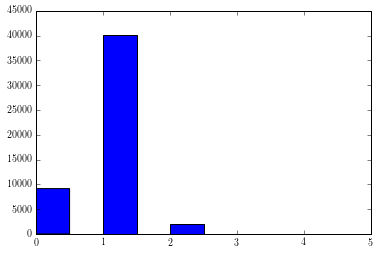

In [23]:
plt.hist([len(x) for x in all_book_LCC])

In [24]:
empty = [x.gutenberg_id for x in q_paper if len(all_book_LCC[x.gutenberg_id-1]) == 0]

In [25]:
print(len(empty))

1020


In [26]:
books_without_P = [x.title for x in q_paper if x.gutenberg_id not in all_books_with_P and x.gutenberg_id not in empty]

In [27]:
print(len(books_without_P))

2929


In [28]:
no_class = [(x.title,list(map(str,all_book_LCC[x.gutenberg_id-1]))) for x in q_paper if len(all_book_LCC[x.gutenberg_id-1]) == 0]

In [29]:
len(no_class)

1020

In [30]:
for x in no_class[:20]:
    print(x)

('Divina Commedia di Dante: Inferno', [])
('Divina Commedia di Dante: Paradiso', [])
('Out Around Rigel', [])
('I Was a Teen-Age Secret Weapon', [])
('Attrition', [])
('Inside John Barth', [])
('The Floating Island of Madness', [])
('Loot of the Void', [])
('The Modern American Pistol and Revolver', [])
('Constantinople\nThe Story of the Old Capital of the Empire', [])
('Michigan Trees\nA Handbook of the Native and Most Important Introduced Species', [])
('Paper-bag Cookery', [])
('Warriors of Old Japan and Other Stories', [])
('The Spell of the Hawaiian Islands and the Philippines\nThe Spell Series', [])
('Memory: How to Develop, Train, and Use It', [])
('Astounding Stories of Super-Science January 1930', [])
('How to Read Human Nature: Its Inner States and Outer Forms', [])
('The Psychology of Salesmanship', [])
('Thought-Culture; Or, Practical Mental Training', [])
('Pistol and Revolver Shooting', [])


In [31]:
class_but_not_P = [(x.title,list(map(str,all_book_LCC[x.gutenberg_id-1]))) for x in q_paper 
                   if x.gutenberg_id not in all_books_with_P and x.gutenberg_id not in empty]

In [32]:
len(class_but_not_P)

2929

In [33]:
for x in class_but_not_P[:20]:
    print(x)

('The Declaration of Independence of the United States of America', ['JK', 'E201'])
('Narrative of the Life of Frederick Douglass, an American Slave', ['E300'])
('The 1990 United States Census', ['HA'])
('Zen and the Art of the Internet', ['TK'])
('The 1990 United States Census [2nd]', ['HA'])
("Hitchhiker's Guide to the Internet", ['TK'])
('Surfing the Internet: An Introduction\r\nVersion 2.0.2', ['TK'])
("Discourse on the Method of Rightly Conducting One's Reason and of Seeking Truth in the Sciences", ['B'])
('The Communist Manifesto', ['HX'])
('The Black Experience in America', ['E151'])
('E-mail 101', ['TK'])
('The Online World', ['TK'])
('Flatland: A Romance of Many Dimensions', ['QA'])
('Collected Articles of Frederick Douglass', ['E300', 'E660'])
("Big Dummy's Guide to the Internet", ['TK'])
('The Number "e"', ['QA'])
('Orthodoxy', ['BR'])
('Common Sense', ['E201'])
('The Autobiography of Benjamin Franklin', ['E300'])
('Take Me for a Ride: Coming of Age in a Destructive Cult', [

In [34]:
class_with_P = [(x.title,list(map(str,all_book_LCC[x.gutenberg_id-1]))) for x in q_paper 
                   if x.gutenberg_id in all_books_with_P]

In [35]:
len(class_with_P)

4651

In [36]:
for x in class_with_P[:50]:
    print(x)

("Alice's Adventures in Wonderland", ['PR', 'PZ'])
('Through the Looking-Glass', ['PZ', 'PR'])
('Peter Pan', ['PZ', 'PR'])
('The Song of Hiawatha', ['PS'])
('Paradise Lost', ['PR'])
("Aesop's Fables\r\nTranslated by George Fyler Townsend", ['PZ', 'PA'])
('O Pioneers!', ['PS'])
('Paradise Lost', ['PR'])
("Aesop's Fables", ['PZ', 'PA'])
('Plays of Sophocles: Oedipus the King; Oedipus at Colonus; Antigone', ['PA'])
('Herland', ['PS'])
('The Scarlet Letter', ['PS'])
('The Time Machine', ['PR'])
('The War of the Worlds', ['PR'])
('The Legend of Sleepy Hollow', ['PS'])
('The Strange Case of Dr. Jekyll and Mr. Hyde', ['PR'])
('The Strange Case of Dr. Jekyll and Mr. Hyde', ['PR'])
('A Christmas Carol in Prose; Being a Ghost Story of Christmas', ['PR'])
('Anne of Avonlea', ['PZ'])
('Anne of the Island', ['PZ'])
('The Marvelous Land of Oz', ['PZ'])
('The Wonderful Wizard of Oz', ['PZ', 'PS'])
('Paradise Regained', ['PR'])
('The Scarlet Pimpernel', ['PR'])
('A Princess of Mars', ['PS'])
('The God

In [37]:
len(class_but_not_P)/float(len(q_paper))

0.3405813953488372

In [38]:
len(no_class)/float(len(q_paper))

0.1186046511627907

In [39]:
len(class_with_P)/float(len(q_paper))

0.5408139534883721

In [40]:
len(all_books_with_P)/end_book

0.48959004078128354

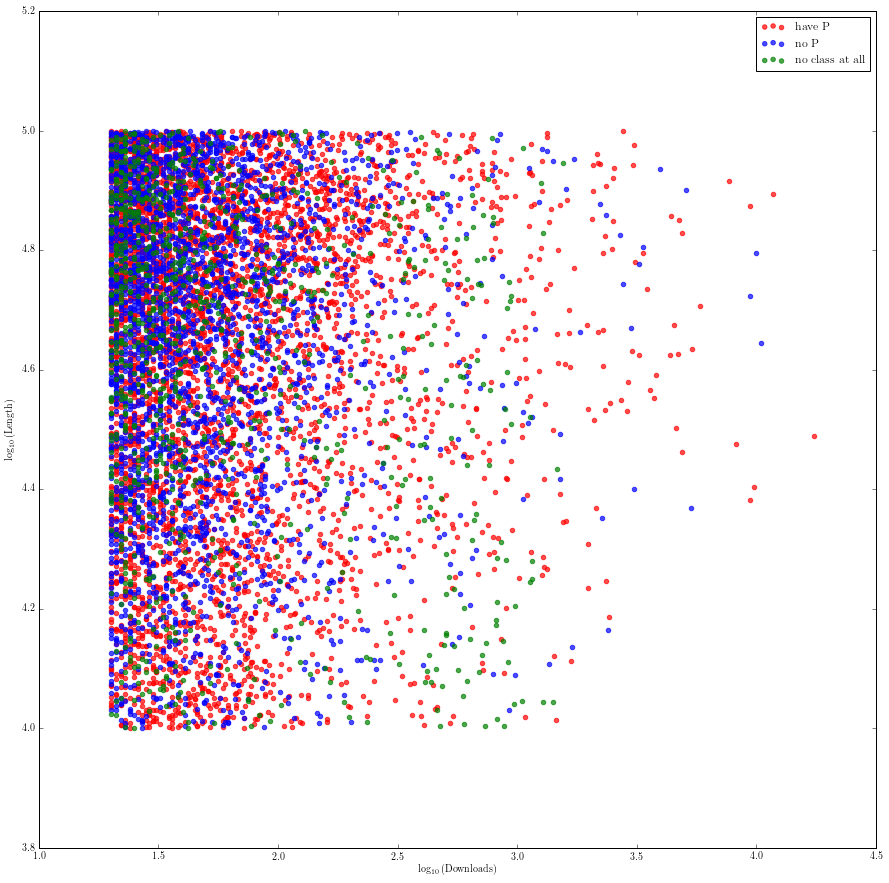

In [41]:
plt.figure(figsize=(15,15))
a = plt.scatter(np.log10([b.downloads for b in q_paper if b.gutenberg_id in all_books_with_P]),
                np.log10([b.length for b in q_paper if b.gutenberg_id in all_books_with_P]),color="r",alpha=0.7)
a = plt.scatter(np.log10([b.downloads for b in q_paper if b.gutenberg_id not in all_books_with_P and b.gutenberg_id not in empty]),
                np.log10([b.length for b in q_paper if b.gutenberg_id not in all_books_with_P and b.gutenberg_id not in empty]),color="b",alpha=0.7)
a = plt.scatter(np.log10([b.downloads for b in q_paper if b.gutenberg_id in empty]),
                np.log10([b.length for b in q_paper if b.gutenberg_id in empty]),color="g",alpha=0.7)
plt.legend(["have P","no P","no class at all"])
plt.xlabel(r"$\displaystyle \log_{10}\, $(Downloads)")
plt.ylabel(r"$\displaystyle \log_{10}\, $(Length)")
# a = ax3.scatter(np.log10([b.downloads for b in q]),np.log10([b.length for b in q]),color="b",alpha=0.7)

In [54]:
from tqdm import tqdm
end_book = 100
end_book= 51249
for i in tqdm(range(end_book)):
    b = Book.objects.get(gutenberg_id=i+1)
    LCCs = ",".join(all_book_LCC[i])
    with_P = False
    # print(all_book_LCC[i])
    for LCC in map(str,all_book_LCC[i]):
        # if there is only one, and it's a P...
        # allow it, but print the name
        if len(all_book_LCC[i]) == 1 and LCC == "P":
            # print(i+1,b.title)
            with_P = True
        if LCC in ["PN","PR","PS","PZ"]:
            with_P = True
            break
#     if i%100 == 0:
#         print(file)
    # print(i+1,LCCs,with_P,b.title)
    b.locc_string = LCCs
    b.locc_with_P = with_P
    b.save()

100%|██████████| 51249/51249 [22:44<00:00, 35.72it/s]


In [113]:
q = Book.objects.filter(exclude=False,
                        lang_code_id=0,locc_with_P=True)
len(q)

14223

In [111]:
keywords = ["stories","collection","poems","complete"
            "essays","fables","tales","papers","poetry",
            "verses","ballads","sketches",r"vol.",
            r"vols.","works","volume","other",]
caught = [[] for key in keywords]
import re
for b in q:
    for i,key in enumerate(keywords):
        if re.findall(r"\b{}\b".format(key),b.title,re.IGNORECASE):
            # print(b.title.replace("\n",": "))
            caught[i].append(b.title.replace("\n",": "))
            b.exclude = True
            b.excludeReason = "keyword match"
            b.save()
            break
for i in range(len(keywords)):
    if len(caught[i]) > 0:
        print("="*80)
        print(keywords[i])
        print("="*80)
        for c in caught[i]:
            print(c)
        print("="*80)

In [126]:
q = Book.objects.filter(exclude=False,length__gt=20000,length__lte=100000,
                        downloads__gte=150,lang_code_id=0,locc_with_P=True)
len(q)

410

In [97]:
f = open("fiction_list_new.txt","w")
for b in q:
    f.write(b.title)
    f.write(",")
    f.write(b.locc_string)
    f.write("\n")
f.close()

In [121]:
.05*10000

500.0